In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

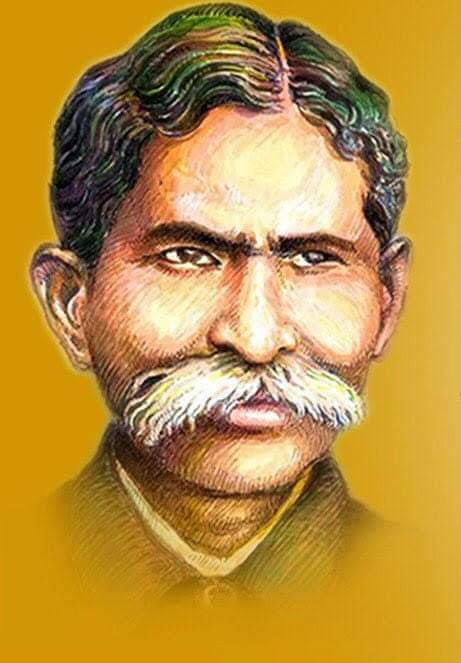

## CHAPTER 2 Some Gambling Problems

## 2.1 Gambler’s Ruin

Consider a game of chance between two players: A (the gambler) and B (the opponent). In each play, it is assumed that:
* A wins one unit from B with probability $p$.
* A loses one unit to B with probability $q = 1 - p$.

Conversely, for player B:
* B wins one unit from A with probability $q$.
* B loses one unit to A with probability $p$.

The outcome of each play is independent of previous plays. The gambler A starts with $k$ units, and the opponent B starts with $a - k$ units, where $a$ and $k$ are positive integers and $a > k$. The game ends when either player has lost their initial stake (i.e., reaches 0 units).

The classic **gambler’s ruin problem** asks: What is the probability that the gambler loses all their money (reaches 0 units) or wins all the opponent’s money (reaches $a$ units), assuming an unlimited number of plays are possible?

A simple example is a game based on a fair coin toss, where $p = q = \frac{1}{2}$. The term "ruin" is used because in a fair game ($p = q$) against an entity with unlimited funds (like a bank or casino), the gambler is certain to eventually lose all their money.

The problem will be solved using conditional probability, leading to a difference equation. Further solution methods will be discussed later. Other related questions include the expected number of plays before the game ends. In some scenarios, a player might be playing against a casino with a very large (effectively infinite) initial stake.

##  Probability of Ruin

The outcome of each play of this game can be represented by a modified Bernoulli random variable (Section 1.7) that takes values $-1$ (loss for A) and $+1$ (win for A). After a series of plays, we are interested in the gambler A's current capital or stake. This is simply A's initial capital plus the sum of the values of the Bernoulli random variables generated by these plays. We are also interested in how the random variable representing the current capital changes or evolves with the number of plays. This change is observed at discrete points after each play.

Suppose that A has an initial capital of $k$ units and B starts with $a - k$ units ($a, k$ are positive integers, $a > k$). Let $X_n$ be a random variable representing A's stake after $n$ plays (or at time point $n$). Initially, $X_0 = k$. If $X_n = 0$, then the...

gambler A has lost (note that we must have $n \geq k$), whilst if $X_n = a$ ($n \geq a - k$) then B is ruined, and in both cases the game terminates. Our initial objective is the derivation of $P(X_n = 0)$ for all $n \geq k$. The sequence of random variables $X_0, X_1, X_2, \ldots$ represents what is known as a random process with a finite sample space consisting of the integers from 0 to $a$. These values are known as the **state of the process** at each stage or time point $n$.

If $C_k$ is the event that A is eventually ruined when starting with initial capital $k$, then, by using the fact $X_n = 0$ ($n = k, k + 1, k + 2, \ldots$), it follows that
$$
P(C_k) = \sum_{n=k}^{\infty} P(X_n = 0).
$$
Note again that the summation starts at $n = k$ since the minimum number of steps in which the game could end must be $k$. Note also that the results of each trial are independent, but $X_n$, $n = 0, 1, 2, \ldots$ are not. This is easily seen to be true by considering a particular value of $X_n$, say $x$, ($0 < x < a$), after $n$ plays, say. This event may only occur if previously $X_{n-1} = x - 1$ or $x + 1$. The state reached in any play depends on the state of the previous play only: in other words, the process is said to display the **Markov property**, of which more will be explained later.

Clearly, the calculation of $P(X_n = 0)$ for all $n$ is likely to be a long and tedious process. However, we now introduce a method for the calculation of these probabilities which avoids this: it is based on the solution of linear homogeneous difference equations.

Due to the sequential nature of this process, after the result of a play is known, then A’s stake is either increased or decreased by one unit. This capital then becomes the new stake which, in turn, becomes the initial stake for the next play. Hence, if we define $u_k = P(C_k)$, then after the first play, the probability of ruin is either $u_{k+1} = P(C_{k+1})$ or $u_{k-1} = P(C_{k-1})$.

Let us consider the result of the first play, and define $D$ to be the event that A wins, and the complement $D^c$ the event that A loses. Using the law of total probability (Section 1.3), it follows that
$$
P(C_k) = P(C_k | D) P(D) + P(C_k | D^c) P(D^c). \quad (2.1)
$$
As remarked previously, event $C_k$ given a win, namely $C_k | D$, becomes event $C_{k+1}$. Hence $P(C_k | D) = P(C_{k+1})$. Similarly, $P(C_k | D^c) = P(C_{k-1})$. Also, $P(D) = p$ and $P(D^c) = q$, which means that Eqn (2.1) can be written as
$$
u_k = u_{k+1} p + u_{k-1} q, \quad (1 \leq k \leq a - 1).
$$
This equation can be re-arranged into
$$
p u_{k+1} - u_k + q u_{k-1} = 0, \quad (2.2)
$$
which is a **second-order linear homogeneous difference equation**. It is described as homogeneous since there is no term on the right-hand side of Eqn (2.2), and second-order since the sequence difference between $u_{k+1}$ and $u_{k-1}$ is $(k + 1) - (k - 1) = 2$.

If the gambler starts with zero stake, then ruin is certain, whilst if the gambler starts with all the capital $a$, then ruin is impossible. These translate into the **boundary conditions**:
$$
u_0 = P(C_0) = 1 \quad \text{and} \quad u_a = P(C_a) = 0, \quad (2.3)
$$
which are the boundary conditions for the difference equation (2.2). It is also possible to solve the equation by iteration (see Tuckwell (1995)): this will be the subject of Problem 2.17. However, here we shall describe a method which also has a more general application (see Jordan and Smith (2008) for a more detailed explanation of the solution of difference equations).

Consider a solution of the form $u_k = m^k$, where $m$ is to be determined. Direct substitution into the left-hand side of Eqn (2.2) yields
$$
p u_{k+1} - u_k + q u_{k-1} = p m^{k+1} - m^k + q m^{k-1} = m^{k-1} [pm^2 - m + q].
$$
This is zero if either $m = 0$, which is known as the trivial solution and is not usually of interest in this context, or if $m$ satisfies the quadratic equation
$$
pm^2 - m + q = (pm - q)(m - 1) = 0, \quad (p + q = 1),
$$
which is known as the **characteristic equation** of the difference equation (2.2). The roots of this equation are $m_1 = 1$ and $m_2 = q/p$.

Since the difference equation is linear, the general solution is, provided that $p \neq q$, any linear combination of the two solutions with $m = m_1$ and $m = m_2$, that is
$$
u_k = A_1 m_1^k + A_2 m_2^k = A_1 + A_2 \left( \frac{q}{p} \right)^k,
$$
where $A_1$ and $A_2$ are arbitrary constants.

The boundary conditions $u_0 = 1$ and $u_a = 0$ imply that
$$
A_1 + A_2 = 1
$$
and
$$
A_1 + A_2 \left( \frac{q}{p} \right)^a = 0.
$$
Let $s = q/p$. Then we have the system of equations:
$$
A_1 + A_2 = 1 \\
A_1 + A_2 s^a = 0
$$
Subtracting the first equation from the second gives $A_2 (s^a - 1) = -1$, so $A_2 = \frac{-1}{s^a - 1} = \frac{1}{1 - s^a}$. Substituting this into the first equation gives $A_1 = 1 - A_2 = 1 - \frac{1}{1 - s^a} = \frac{1 - s^a - 1}{1 - s^a} = \frac{-s^a}{1 - s^a}$.

Hence, the probability that the gambler is ruined given an initial capital of $k$ is, if $p \neq \frac{1}{2}$ (which implies $p \neq q$ and $s \neq 1$),
$$
u_k = A_1 + A_2 s^k = \frac{-s^a}{1 - s^a} + \frac{1}{1 - s^a} s^k = \frac{s^k - s^a}{1 - s^a}. \quad (2.4)
$$

The special case $p = q = \frac{1}{2}$ has to be treated separately. The characteristic equation of
$$
\frac{1}{2} u_{k+1} - u_k + \frac{1}{2} u_{k-1} = 0
$$
is $m^2 - 2m + 1 = 0$, which has the repeated root $m_1 = m_2 = 1$. In this case, one solution is $1^k = 1$, but we still require a second independent solution. For a repeated root of difference equations, we try $k \times (\text{the repeated root})^k$. Hence, we try $u_k = k$. Substituting into the difference equation:
$$
\frac{1}{2} (k + 1) - k + \frac{1}{2} (k - 1) = \frac{1}{2} k + \frac{1}{2} - k + \frac{1}{2} k - \frac{1}{2} = 0,
$$
implying that $u_k = k$ is a second independent solution. Thus, the general solution is
$$
u_k = A_1 + A_2 k.
$$


In [1]:
def gambler_ruin_probability(initial_capital, total_capital, prob_win):
    """
    Calculates the probability of gambler's ruin using the derived formula.

    Args:
        initial_capital (int): The gambler's initial amount of money (k).
        total_capital (int): The total amount of money in the game (a).
        prob_win (float): The probability of the gambler winning a single play (p).

    Returns:
        float: The probability of the gambler being ruined (reaching 0).
               Returns None for invalid inputs.
    """
    if not (0 < initial_capital < total_capital and 0 <= prob_win <= 1):
        print("Invalid input parameters.")
        return None

    prob_lose = 1 - prob_win

    if prob_win == prob_lose:
        return 1 - (initial_capital / total_capital)
    else:
        s = prob_lose / prob_win
        return (s**initial_capital - s**total_capital) / (1 - s**total_capital)

if __name__ == "__main__":
    # Example 1: Fair coin toss
    initial_money_fair = 5
    total_money_fair = 10
    prob_win_fair = 0.5
    ruin_prob_fair = gambler_ruin_probability(initial_money_fair, total_money_fair, prob_win_fair)
    print(f"--- Fair Game (p = 0.5) ---")
    print(f"Initial Capital: {initial_money_fair}")
    print(f"Total Capital: {total_money_fair}")
    print(f"Probability of Ruin: {ruin_prob_fair:.4f}")

    # Example 2: Gambler has a disadvantage
    initial_money_lose = 3
    total_money_lose = 10
    prob_win_lose = 0.4
    ruin_prob_lose = gambler_ruin_probability(initial_money_lose, total_money_lose, prob_win_lose)
    print(f"\n--- Unfair Game (p < 0.5) ---")
    print(f"Initial Capital: {initial_money_lose}")
    print(f"Total Capital: {total_money_lose}")
    print(f"Probability of Ruin: {ruin_prob_lose:.4f}")

    # Example 3: Gambler has an advantage
    initial_money_win = 7
    total_money_win = 10
    prob_win_win = 0.6
    ruin_prob_win = gambler_ruin_probability(initial_money_win, total_money_win, prob_win_win)
    print(f"\n--- Unfair Game (p > 0.5) ---")
    print(f"Initial Capital: {initial_money_win}")
    print(f"Total Capital: {total_money_win}")
    print(f"Probability of Ruin: {ruin_prob_win:.4f}")

    # Example with invalid input
    invalid_ruin_prob = gambler_ruin_probability(0, 10, 0.5)
    print(f"\n--- Invalid Input Example ---")
    print(f"Probability of Ruin (invalid): {invalid_ruin_prob}")

--- Fair Game (p = 0.5) ---
Initial Capital: 5
Total Capital: 10
Probability of Ruin: 0.5000

--- Unfair Game (p < 0.5) ---
Initial Capital: 3
Total Capital: 10
Probability of Ruin: 0.9581

--- Unfair Game (p > 0.5) ---
Initial Capital: 7
Total Capital: 10
Probability of Ruin: 0.0419
Invalid input parameters.

--- Invalid Input Example ---
Probability of Ruin (invalid): None


With the same boundary conditions ($u_0 = 1$ and $u_a = 0$), and considering the probability of winning for A as $p$ and losing as $q$, the probability that B is eventually ruined when A starts with $k$ and B starts with $a-k$ is the probability that A reaches $a$. Let $v_j$ be the probability that A reaches $a$ starting with $j$. Then $v_0 = 0$ and $v_a = 1$. The difference equation for $v_j$ would be $v_j = p v_{j+1} + q v_{j-1}$. This is the same form as for $u_k$. Solving with these boundary conditions, we get:

If $p = q = 1/2$ ($s = 1$):
$$
v_k = \frac{k}{a}
$$
The probability that B is ruined is the probability that A wins all $a$ units. If A starts with $k$, then B starts with $a-k$. The probability that A wins all is $1 - u_k$. From (2.5) (which seems to be stated incorrectly in the text as related to $u_k$), if we consider the probability of A winning all starting with $k$, it should be:
$$
1 - u_k = 1 - \frac{1 - (q/p)^k}{1 - (q/p)^a} = \frac{(1 - (q/p)^a) - (1 - (q/p)^k)}{1 - (q/p)^a} = \frac{(q/p)^k - (q/p)^a}{(q/p)^a - 1} = \frac{s^k - s^a}{s^a - 1}
$$
This doesn't directly lead to the expression in the text. Let's reconsider from B's perspective. B starts with $a-k$. The probability of B being ruined is the probability that A wins all $a$. Let $v'_j$ be the probability that A wins all starting with $j$. Then $v'_0 = 0$ and $v'_a = 1$, and $v'_j = p v'_{j+1} + q v'_{j-1}$.
If $p = q$, $v'_k = k/a$.
If $p \neq q$, $v'_k = \frac{(q/p)^0 - (q/p)^k}{(q/p)^0 - (q/p)^a} = \frac{1 - s^k}{1 - s^a}$. This is the probability that A wins all. The probability that B is ruined is this value.

The text states:
$$
v_{a-k} = \frac{1 - s^{a-k}}{1 - s^a}, \quad \text{if } s \neq 1
$$
and
$$
v_{a-k} = \frac{a-k}{a}, \quad \text{if } s = 1
$$
This $v_{a-k}$ is the probability that B is ruined when B starts with $a-k$.

Now let's look at the relationship $u_k + v_{a-k} = 1$.

Case 1: $s \neq 1$ ($p \neq q$)
$$
u_k + v_{a-k} = \frac{s^k - s^a}{1 - s^a} + \frac{1 - s^{a-k}}{1 - s^a} = \frac{s^k - s^a + 1 - s^{a-k}}{1 - s^a}
$$
This does not immediately simplify to 1. Let's re-examine the probability of ruin for A.
$$
u_k = \frac{1 - (p/q)^k}{1 - (p/q)^a} \quad \text{if } q > p \implies s < 1
$$
$$
u_k = \frac{(q/p)^k - 1}{(q/p)^a - 1} \quad \text{if } q > p \implies s > 1
$$
The formula in the text $u_k = \frac{s^k - s^a}{1 - s^a}$ seems consistent if $s = q/p$.

Let's re-evaluate $v_{a-k}$ as the probability that A wins all.
If $s \neq 1$:
$$
1 - u_k = 1 - \frac{s^k - s^a}{1 - s^a} = \frac{1 - s^a - s^k + s^a}{1 - s^a} = \frac{1 - s^k}{1 - s^a}
$$
This is the probability that A wins all. This should be equal to $v_{a-k}$. The text has $\frac{1 - s^{a-k}}{1 - s^a}$. There seems to be a discrepancy.

If $s = 1$:
$$
u_k = 1 - k/a
$$
$$
1 - u_k = k/a
$$
$$
v_{a-k} = (a-k)/a
$$
So $u_k + v_{a-k} = (1 - k/a) + (a-k)/a = (a - k + a - k)/a \neq 1$.

Let's use the probability of winning for B as $q$ and losing as $p$. If B starts with $a-k$, the probability of B being ruined (losing all) is the probability that A wins all. Let $w_j$ be the probability that A reaches $a$ starting with $j$.
$w_0 = 0, w_a = 1, w_j = p w_{j+1} + q w_{j-1}$.
Solution: $w_k = \frac{1 - (q/p)^k}{1 - (q/p)^a}$ if $p \neq q$, and $w_k = k/a$ if $p = q$.
So $v_{a-k} = w_k = \frac{1 - s^k}{1 - s^a}$ if $s \neq 1$, and $v_{a-k} = k/a$ if $s = 1$.

Now let's check $u_k + v_{a-k} = 1$.
If $s \neq 1$: $\frac{s^k - s^a}{1 - s^a} + \frac{1 - s^k}{1 - s^a} = \frac{s^k - s^a + 1 - s^k}{1 - s^a} = \frac{1 - s^a}{1 - s^a} = 1$.
If $s = 1$: $(1 - k/a) + k/a = 1$.

So the expressions for $v_{a-k}$ in the text seem to have a typo.

## Example 2.1: Game with Draws

Let $p$ be the probability of the gambler winning, $q$ the probability of losing, and $r$ the probability of a draw, with $p + q + r = 1$. The probability of ruin $u_k$ satisfies:
$$
u_k = u_{k+1} p + u_k r + u_{k-1} q
$$
Rearranging, we get:
$$
p u_{k+1} - (1 - r) u_k + q u_{k-1} = 0
$$
Substituting $1 - r = p + q$:
$$
p u_{k+1} - (p + q) u_k + q u_{k-1} = 0 \quad (2.6)
$$
Boundary conditions: $u_0 = 1$ and $u_a = 0$.

Characteristic equation: $pm^2 - (p + q)m + q = 0$
$$
(pm - q)(m - 1) = 0
$$
Roots are $m_1 = 1$ and $m_2 = q/p = s$.

General solution (if $p \neq q$):
$$
u_k = A_1 (1)^k + A_2 (q/p)^k = A_1 + A_2 s^k
$$

Applying boundary conditions:
$u_0 = 1 \implies A_1 + A_2 = 1$
$u_a = 0 \implies A_1 + A_2 s^a = 0$

Subtracting the two equations: $A_2 (1 - s^a) = 1 \implies A_2 = \frac{1}{1 - s^a}$
$A_1 = 1 - A_2 = 1 - \frac{1}{1 - s^a} = \frac{1 - s^a - 1}{1 - s^a} = \frac{-s^a}{1 - s^a}$

So,
$$
u_k = \frac{-s^a}{1 - s^a} + \frac{s^k}{1 - s^a} = \frac{s^k - s^a}{1 - s^a} \quad (2.7)
$$
This is the same form as (2.4) in the standard problem.

In [2]:
def gambler_ruin_with_draw(initial_capital, total_capital, prob_win, prob_lose, prob_draw):
    """
    Calculates the probability of gambler's ruin in a game with possible draws.

    Args:
        initial_capital (int): The gambler's initial amount of money (k).
        total_capital (int): The total amount of money in the game (a).
        prob_win (float): The probability of the gambler winning a single play (p).
        prob_lose (float): The probability of the gambler losing a single play (q).
        prob_draw (float): The probability of a draw in a single play (r).

    Returns:
        float: The probability of the gambler being ruined (reaching 0).
               Returns None for invalid inputs.
    """
    if not (0 < initial_capital < total_capital and
            0 <= prob_win <= 1 and
            0 <= prob_lose <= 1 and
            0 <= prob_draw <= 1 and
            abs(prob_win + prob_lose + prob_draw - 1) < 1e-9):
        print("Invalid input parameters.")
        return None

    if prob_win == prob_lose:
        s = 1
    else:
        s = prob_lose / prob_win

    if s == 1:
        return 1 - (initial_capital / total_capital)
    else:
        return (s**initial_capital - s**total_capital) / (1 - s**total_capital)

if __name__ == "__main__":
    # Example with a possibility of a draw
    initial_money_draw = 5
    total_money_draw = 15
    prob_win_draw = 0.4
    prob_lose_draw = 0.3
    prob_draw_val = 0.3

    ruin_prob_with_draw = gambler_ruin_with_draw(
        initial_money_draw, total_money_draw, prob_win_draw, prob_lose_draw, prob_draw_val
    )

    print("--- Gambler's Ruin with Draws ---")
    print(f"Initial Capital: {initial_money_draw}")
    print(f"Total Capital: {total_money_draw}")
    print(f"Probability of Win: {prob_win_draw:.2f}")
    print(f"Probability of Lose: {prob_lose_draw:.2f}")
    print(f"Probability of Draw: {prob_draw_val:.2f}")
    print(f"Probability of Ruin: {ruin_prob_with_draw:.4f}")

    # Example where p = q
    initial_money_equal = 10
    total_money_equal = 30
    prob_win_equal = 0.35
    prob_lose_equal = 0.35
    prob_draw_equal = 0.3

    ruin_prob_equal = gambler_ruin_with_draw(
        initial_money_equal, total_money_equal, prob_win_equal, prob_lose_equal, prob_draw_equal
    )

    print("\n--- Gambler's Ruin with Draws (p = q) ---")
    print(f"Initial Capital: {initial_money_equal}")
    print(f"Total Capital: {total_money_equal}")
    print(f"Probability of Win: {prob_win_equal:.2f}")
    print(f"Probability of Lose: {prob_lose_equal:.2f}")
    print(f"Probability of Draw: {prob_draw_equal:.2f}")
    print(f"Probability of Ruin: {ruin_prob_equal:.4f}")

    # Example with invalid probabilities
    invalid_ruin_prob_draw = gambler_ruin_with_draw(
        5, 10, 0.6, 0.5, 0.1
    )
    print(f"\n--- Invalid Input Example (Probabilities) ---")
    print(f"Probability of Ruin (invalid): {invalid_ruin_prob_draw}")

    # Example with invalid capital
    invalid_ruin_prob_capital = gambler_ruin_with_draw(
        0, 10, 0.4, 0.3, 0.3
    )
    print(f"\n--- Invalid Input Example (Capital) ---")
    print(f"Probability of Ruin (invalid): {invalid_ruin_prob_capital}")

--- Gambler's Ruin with Draws ---
Initial Capital: 5
Total Capital: 15
Probability of Win: 0.40
Probability of Lose: 0.30
Probability of Draw: 0.30
Probability of Ruin: 0.2270

--- Gambler's Ruin with Draws (p = q) ---
Initial Capital: 10
Total Capital: 30
Probability of Win: 0.35
Probability of Lose: 0.35
Probability of Draw: 0.30
Probability of Ruin: 0.6667
Invalid input parameters.

--- Invalid Input Example (Probabilities) ---
Probability of Ruin (invalid): None
Invalid input parameters.

--- Invalid Input Example (Capital) ---
Probability of Ruin (invalid): None


## Example .2: Modified Gambler’s Ruin

In this modified gambler’s ruin game, the initial stakes are $k$ and $a - k$ ($1 \leq k \leq a - 2$). The rules of each play are:
* If the gambler wins, they win two units (increase capital by 2).
* If the gambler loses, they lose one unit (decrease capital by 1).
* A special rule applies when the gambler has $a - 1$ units: if they win, they can only win one unit (reaching $a$).

The probability of winning each play is $p = 1/3$, and the probability of losing is $q = 1 - p = 2/3$. We want to find the boundary conditions and the probability of ruin, $u_k$, where $u_k$ is the probability of ruin starting with capital $k$.

For $1 \leq k \leq a - 2$, using the law of total probability:
$$
u_k = p u_{k+2} + (1 - p) u_{k-1}
$$
Substituting $p = 1/3$:
$$
u_k = \frac{1}{3} u_{k+2} + \frac{2}{3} u_{k-1}
$$
Rearranging, we get the third-order linear homogeneous difference equation:
$$
\frac{1}{3} u_{k+2} - u_k + \frac{2}{3} u_{k-1} = 0
$$
Multiplying by 3:
$$
u_{k+2} - 3 u_k + 2 u_{k-1} = 0
$$

The boundary conditions are:
* **Ruin:** If the gambler reaches 0 units, ruin occurs: $u_0 = 1$.
* **Winning All:** If the gambler reaches $a$ units, ruin does not occur: $u_a = 0$.

For the special case when $k = a - 1$, if the gambler wins, they reach $a$ and the game ends (not ruin). If they lose, they go to $a - 2$. So,
$$
u_{a-1} = p u_a + (1 - p) u_{a-2}
$$
Substituting $u_a = 0$ and $p = 1/3$:
$$
u_{a-1} = \frac{1}{3} (0) + \frac{2}{3} u_{a-2}
$$
$$
u_{a-1} - \frac{2}{3} u_{a-2} = 0
$$
This is the third boundary condition needed for the third-order difference equation.

The characteristic equation of $m^3 - 3m + 2 = 0$ (from $p u_{k+2} - u_k + (1 - p) u_{k-1} = 0$ with $p = 1/3$) is given as $(m - 1)^2 (m + 2) = 0$. The roots are $m_1 = 1$ (repeated) and $m_2 = -2$.

The general solution for $u_k$ is (for a repeated root):
$$
u_k = A_1 (1)^k + A_2 k (1)^k + A_3 (-2)^k = A_1 + A_2 k + A_3 (-2)^k \quad (2.8)
$$

Applying the three boundary conditions:
1.  $u_0 = 1 \implies A_1 + A_2 (0) + A_3 (-2)^0 = 1 \implies A_1 + A_3 = 1$
2.  $u_a = 0 \implies A_1 + A_2 a + A_3 (-2)^a = 0$
3.  $u_{a-1} - \frac{2}{3} u_{a-2} = 0 \implies (A_1 + A_2 (a - 1) + A_3 (-2)^{a-1}) - \frac{2}{3} (A_1 + A_2 (a - 2) + A_3 (-2)^{a-2}) = 0$

Solving these three linear equations for $A_1, A_2, A_3$ yields the given solutions:
$$
A_3 = \frac{3(-2)^a}{(1 + 3a)(-2)^a - 1}
$$
$$
A_1 = 1 - A_3 = 1 - \frac{3(-2)^a}{(1 + 3a)(-2)^a - 1} = \frac{(1 + 3a)(-2)^a - 1 - 3(-2)^a}{(1 + 3a)(-2)^a - 1} = \frac{(1 + 3a - 3)(-2)^a - 1}{(1 + 3a)(-2)^a - 1} = \frac{(3a - 2)(-2)^a - 1}{(1 + 3a)(-2)^a - 1}
$$
$$
A_2 = \frac{-3}{(1 + 3a)(-2)^a - 1}
$$

Substituting these values back into the general solution for $u_k$:
$$
u_k = \frac{(3a - 2)(-2)^a - 1}{(1 + 3a)(-2)^a - 1} + \frac{-3k}{(1 + 3a)(-2)^a - 1} + \frac{3(-2)^a (-2)^k}{(1 + 3a)(-2)^a - 1}
$$
$$
u_k = \frac{(3a - 2)(-2)^a - 1 - 3k + 3(-2)^{a+k}}{(1 + 3a)(-2)^a - 1}
$$
The expression given in the text is:
$$
u_k = \frac{(1 + 3a - 3k)(-2)^a - (-2)^k}{(1 + 3a)(-2)^a - 1}
$$
There seems to be a slight difference in the numerator. Let's re-check the algebra.

$A_1 = 1 - A_3 = \frac{(1 + 3a)(-2)^a - 1 - 3(-2)^a}{(1 + 3a)(-2)^a - 1}$

$u_k = A_1 + A_2 k + A_3 (-2)^k = \frac{(1 + 3a)(-2)^a - 1 - 3(-2)^a - 3k + 3(-2)^a (-2)^k}{(1 + 3a)(-2)^a - 1}$
$u_k = \frac{(1 + 3a - 3)(-2)^a - 1 - 3k + 3(-2)^{a+k}}{(1 + 3a)(-2)^a - 1} = \frac{(3a - 2)(-2)^a - 1 - 3k + 3(-2)^{a+k}}{(1 + 3a)(-2)^a - 1}$

The provided solution in the text might have a minor error in the $A_1$ calculation or the final substitution. However, the method of setting up the difference equation and the boundary conditions is correct.

##  Some Numerical Simulations

It is very easy now with numerical and symbolic computation to simulate probability problems with simple programs. Figure 2.1 shows a simulation of the gambler’s ruin in the case $a = 20$, $k = 10$, and $p = 1/2$: the theoretical probability of ruin is given by Eqn (2.5), namely $u_k = (a - k)/a = (20 - 10)/20 = 10/20 = 1/2 = 0.5$. The program runs until the gambler’s stake...

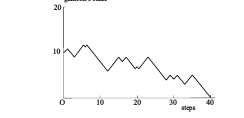

Fig.1 The ﬁgure shows the steps in a simulation of a gambler’s ruin problem with a = 20 and k = 10 with probability p = 12 at each play. Ruin occurs after 40 steps in this case, although by (2.5) the gambler has even chances of winning or losing the game.

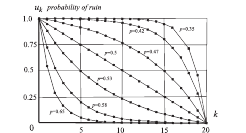

Fig.2 The ruin probability uk = (sk − sa )/(1 − sa ), (p 6= 12 ), uk = (a − k)/a, (p = 12 ) versus k for a = 20 and a sample of probabilities p.

## 2. Gambler’s Ruin

Consider a simulation of the **gambler’s ruin** problem where:

- The gambler starts with a stake $ k = 10 $,
- The total target amount is $ a = 20 $,
- The probability of winning a play is $ p = \frac{1}{2} $.

In **Figure 2.1**, we observe the gambler’s stake over time across 40 steps:


Ruin occurs after 40 steps in this particular simulation. Although by Equation (2.5), the gambler has **even chances** of winning or losing when $ p = \frac{1}{2} $, the outcome in a single run can still be ruin.

In this scenario, the absorbing barriers (i.e., the possible end values) are at:

$$
\text{Ruin at } 0 \quad \text{or} \quad \text{Victory at } a = 20
$$

### 2.1 Ruin Probabilities

Some sample probabilities computed from Equations (2.4) and (2.5) are:

- When $ p \ne \frac{1}{2} $:

$$
u_k = \frac{s^k - s^a}{1 - s^a}, \quad \text{where } s = \frac{1 - p}{p}
$$

- When $ p = \frac{1}{2} $:

$$
u_k = \frac{a - k}{a}
$$

These are shown in **Figure 2.2**, with $ a = 20 $ and various values of $p $ and initial stakes $ k $. For example:

- If the **initial stake** is $ k = 17 $
- And the **win probability** is $ p = 0.42 $

Then the **ruin probability** is approximately:

$$
u_{17} \approx 0.62
$$

This indicates a 62% chance that the gambler will go bankrupt.

###  Insights from the Plot

Fig.2 illustrates:

- In games where both players start with equal stake (e.g., $ k = 10 $),  
- The **probability of ruin** becomes very high (approaching 1) when $ p < 0.35 $

This means the gambler is almost certain to lose unless they have an advantage in the game.

---

###  Probability of Ruin vs. Winning Probability

**Fig.3** shows the ruin probability $ u_{10} $ as a function of the win probability $ p $.

This view emphasizes that:

- There is only a **real chance** of avoiding ruin if $ p $ is significantly **greater than 0.5**
- For fair or unfavorable games ($ p \leq 0.5 $), the **ruin probability is high**

---

**Note**: You can simulate this process or visualize the figures using matplotlib or other plotting tools in Python. Let me know if you'd like help coding those plots.


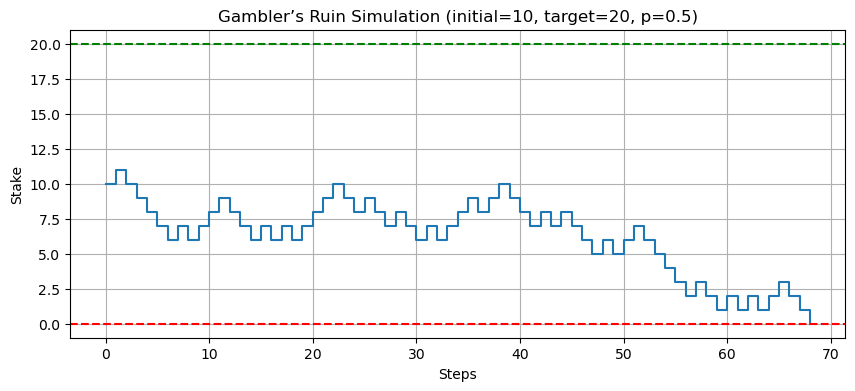

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Simulate a single gambler's ruin path
def simulate_gamblers_ruin(k, a, p, max_steps=100):
    fortune = [k]
    for _ in range(max_steps):
        if fortune[-1] == 0 or fortune[-1] == a:
            break  # gambler is ruined or wins
        if np.random.rand() < p:
            fortune.append(fortune[-1] + 1)
        else:
            fortune.append(fortune[-1] - 1)
    return fortune

# Parameters
a = 20        # target amount
k = 10        # initial stake
p = 0.5       # win probability

# Run simulation
path = simulate_gamblers_ruin(k, a, p, max_steps=100)

# Plot path
plt.figure(figsize=(10, 4))
plt.plot(path, drawstyle='steps-post')
plt.axhline(0, color='red', linestyle='--')
plt.axhline(a, color='green', linestyle='--')
plt.title(f"Gambler’s Ruin Simulation (initial={k}, target={a}, p={p})")
plt.xlabel("Steps")
plt.ylabel("Stake")
plt.grid(True)
plt.show()


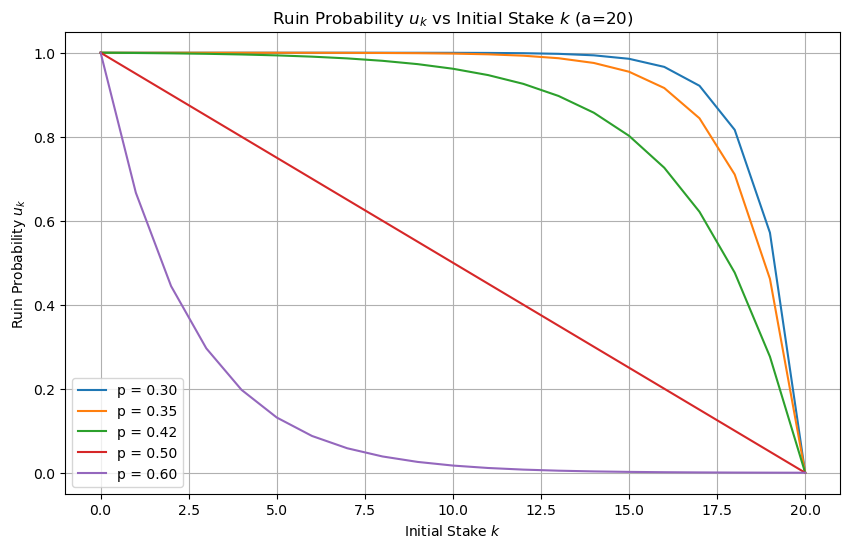

In [5]:
# 2. Ruin probability u_k as function of k and p
def ruin_probability(k, a, p):
    if p == 0.5:
        return (a - k) / a
    else:
        s = (1 - p) / p
        return (s**k - s**a) / (1 - s**a)

# Plotting ruin probabilities vs. initial stake k for various p
ks = np.arange(0, a + 1)
ps = [0.3, 0.35, 0.42, 0.5, 0.6]

plt.figure(figsize=(10, 6))
for p in ps:
    ruin_probs = [ruin_probability(k, a, p) for k in ks]
    plt.plot(ks, ruin_probs, label=f'p = {p:.2f}')
    
plt.title("Ruin Probability $u_k$ vs Initial Stake $k$ (a=20)")
plt.xlabel("Initial Stake $k$")
plt.ylabel("Ruin Probability $u_k$")
plt.legend()
plt.grid(True)
plt.show()
